# 🏏 IPL Data Analysis (2008–2024)

This project analyzes historical Indian Premier League (IPL) data from 2008 to 2024. We explore player performances, team statistics, toss impact, and venue insights using Python.

**Tools Used**: Python, Pandas, Matplotlib, Seaborn  
**Datasets**: `matches.csv`, `deliveries.csv`  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style = 'whitegrid')

# Load datasets
matches = pd.read_csv('E:\\khushi\\ABC\\Dreamland\\raiseF\\freelancing\\data\\ipl\\matches.csv')
deliveries = pd.read_csv('E:\\khushi\\ABC\\Dreamland\\raiseF\\freelancing\\data\\ipl\\deliveries.csv')

# Quick preview
matches.head(), deliveries.head()

(       id   season        city        date match_type player_of_match  \
 0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
 1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
 2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
 3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
 4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \


In [2]:

# Check missing values
print("Matches:\n", matches.isnull().sum())
print("Deliveries:\n", deliveries.isnull().sum())

# Drop unneeded columns
#matches.drop(['method','umpire1','umpire2'], axis = 1, inplace = True)

# Replace team names
team_mapping = {
    'Mumbai Indians': 'MI', 'Kolkata Knight Riders': 'KKR',
    'Royal Challengers Bangalore': 'RCB', 'Royal Challengers Bengaluru': 'RCB',
    'Deccan Chargers': 'DCR','Chennai Super Kings': 'CSK', 
    'Rajasthan Royals': 'RR', 'Sunrisers Hyderabad': 'SRH',
    'Delhi Daredevils': 'DD', 'Delhi Capitals': 'DC',
    'Gujarat Lions': 'GL', 'Gujarat Titans': 'GT',
    'Kings XI Punjab': 'KXIP', 'Punjab Kings': 'PBK',
    'Rising Pune Supergiants': 'RPS', 'Rising Pune Supergiant': 'RPS',
    'Kochi Tuskers Kerala': 'KTK', 'Lucknow Super Giants' : 'LSG',
    'Pune Warriors': 'PW', 'Delhi Capitals': 'DC'
}
matches.replace(team_mapping, inplace = True)
deliveries.replace(team_mapping, inplace = True)

Matches:
 id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
Deliveries:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


## 📊 Exploratory Data Analysis

* Match insights

Total matches: 1095
Total venues: 58


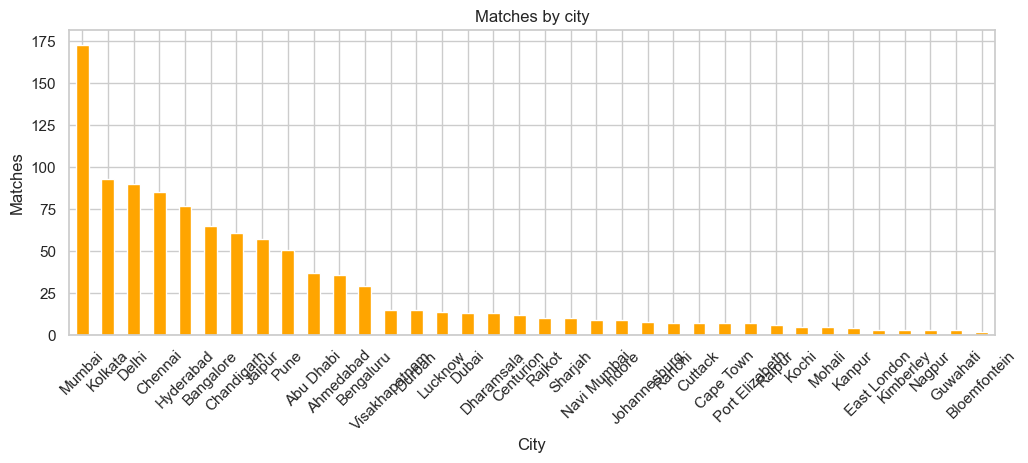

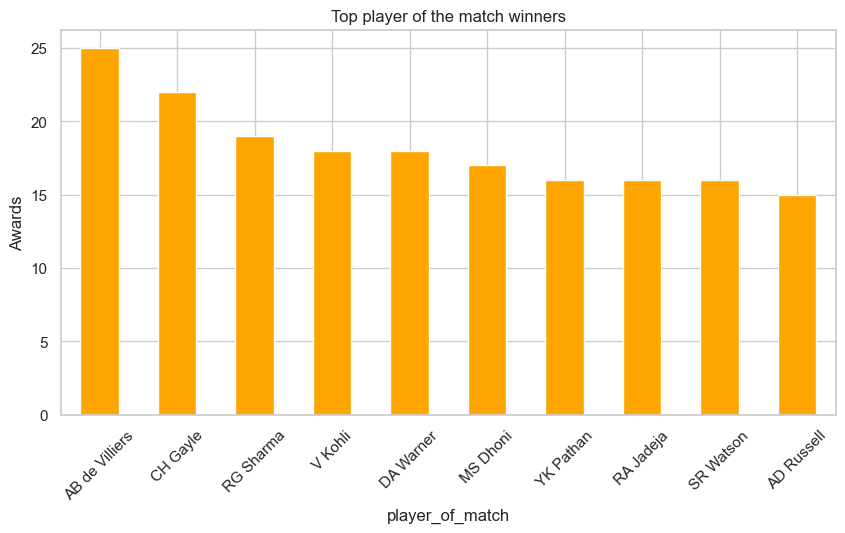

In [10]:
# Total matches and venues
print("Total matches:", matches.shape[0])
print("Total venues:", matches['venue'].nunique())

# Matches per city
matches['city'].value_counts().plot(kind = 'bar', color = 'orange', figsize = (10, 5), title = 'Matches by city')
plt.tight_layout()
plt.xlabel('City')
plt.ylabel('Matches')
plt.xticks(rotation = 45)
plt.show()

# Player of the match leaders
matches['player_of_match'].value_counts().head(10).plot(kind = 'bar', color = 'orange', figsize = (10, 5))
plt.title('Top player of the match winners')
plt.ylabel('Awards')
plt.xticks(rotation = 45)
plt.show()

* Batting and bowling stats

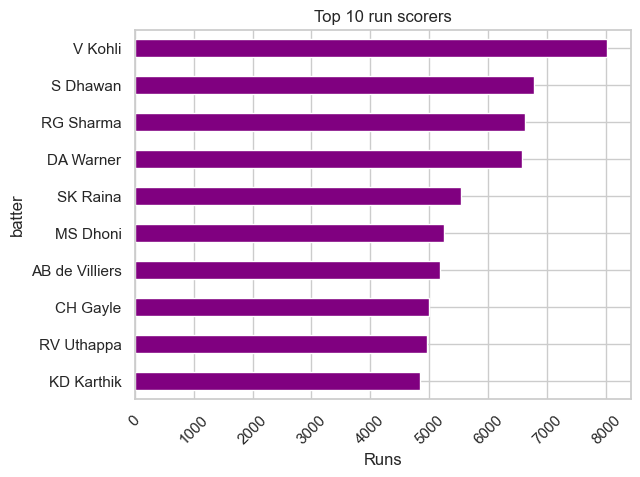

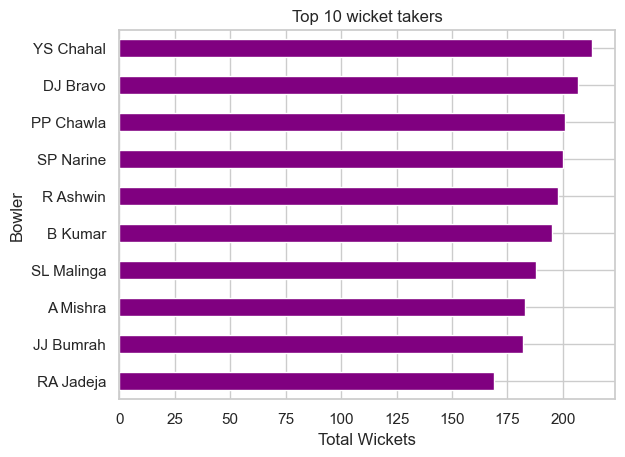

In [11]:
# Top run scorers
top_run_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending = False).head(10)
top_run_scorers.plot(kind = 'barh', color = 'purple')
plt.title('Top 10 run scorers')
plt.xlabel('Runs')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()
plt.show()

# Top wicket takers
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
top_wicket_takers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10)
top_wicket_takers.plot(kind = 'barh', color = 'purple')
plt.title('Top 10 wicket takers')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.gca().invert_yaxis()
plt.show()

* Toss analysis

In [5]:
# Toss winner also winning the match
toss_win_match_win = matches[matches['toss_winner'] == matches['winner']]
percentage = len(toss_win_match_win) / len(matches) * 100
print(f'Toss winner who also win the match: {percentage:.2f}%')

Toss winner who also win the match: 50.59%


* Consistant performers across season

In [6]:
# Total runs per batsman per season
runs_per_season = deliveries.merge(matches[['id','season']], left_on = 'match_id', right_on = 'id').groupby(['season','batter'])['batsman_runs'].sum().reset_index()

# Top 5 consistent batsman (appearing in top 10 across most seasons)
top_performers = runs_per_season.groupby('season', group_keys = False).apply(lambda x: x.nlargest(10, 'batsman_runs'), include_groups = False).reset_index(drop = True)

# Count appearence in top 10
consistant_batsman = top_performers['batter'].value_counts().head(5)

print("Runs per season\n", runs_per_season, "\n")
print("Top performers\n", top_performers, "\n")
print("Consitant batsman\n", consistant_batsman, "\n")

Runs per season
        season             batter  batsman_runs
0     2007/08           A Chopra            42
1     2007/08           A Kumble            13
2     2007/08           A Mishra            37
3     2007/08           A Mukund             0
4     2007/08            A Nehra             3
...       ...                ...           ...
2612     2024           WG Jacks           230
2613     2024            WP Saha           136
2614     2024  Washington Sundar             0
2615     2024        YBK Jaiswal           435
2616     2024      Yudhvir Singh            21

[2617 rows x 3 columns] 

Top performers
               batter  batsman_runs
0           SE Marsh           616
1          G Gambhir           534
2      ST Jayasuriya           514
3          SR Watson           472
4           GC Smith           441
..               ...           ...
165  B Sai Sudharsan           527
166         KL Rahul           520
167         N Pooran           499
168        SP Narine      

* Death over specialists

In [7]:
# Filter to overs 16-20 (death overs)
death_overs = deliveries[deliveries['over'] > 16]

# Most wickets in death overs
death_wickets = death_overs[death_overs['dismissal_kind'].notnull()].groupby('bowler').size().sort_values(ascending = False).head(10)
death_wickets

bowler
DJ Bravo          103
SL Malinga         90
B Kumar            80
HV Patel           68
JJ Bumrah          68
MM Sharma          63
Mohammed Shami     57
SP Narine          54
R Vinay Kumar      50
CH Morris          50
dtype: int64

## 🔍 Key Insights

- **Venue Trends**: Mumbai, kolkata and delhi are top match-hosting cities.
- **Top Players**: Consistent performers like V Kohli and S Dhavan are frequent match-winners.
- **Toss Impact**: Toss winners win 50.59% of the time; toss isn't always a game-decider.
- **Wicket Kings**: Bowlers like chahal and Bravo dominate wickets across seasons.
- **Seasonal Consistency** : Virat Kohli and Suresh Raina frequently rank among top 10 run-scorers—highlighting their sustained performance   across multiple IPL seasons.
- **Death Over Dominance** : Lasith Malinga and Dwayne Bravo are top wicket-takers in overs 16–20, proving their effectiveness under late-    innings pressure.

## 📌 Conclusion

This analysis reveals patterns in IPL match outcomes, team strategies, and individual performances. It offers useful insights for cricket analysts and fans alike.

### 🚀 Future Improvements:
- Add interactive dashboards (Plotly/Streamlit)
- Predictive modeling: match winners or top players
- Deeper player-by-player breakdown